In [2]:
print('hidafs')

hidafs


In [3]:
import pandas as pd

df = pd.read_excel (r'C:\Users\user\Documents\GitHub\Python\UvA material\Financial markets\KrispyKreme2021.xlsx')
print (df)

         t      Time  Trade Size (|q_t|)  Price (p_t)  Direction (d_t)  \
0        1  09:30:02                 200         2.99               -1   
1        2  09:32:28                 500         3.01                1   
2        3  09:33:35                 100         3.02               -1   
3        4  09:33:38                 100         3.00                1   
4        5  09:34:09                 100         3.03                1   
...    ...       ...                 ...          ...              ...   
1444  1445  15:59:12                 200         3.06                1   
1445  1446  15:59:12                 200         3.06                1   
1446  1447  15:59:12                 200         3.06                1   
1447  1448  15:59:12                 200         3.06                1   
1448  1449  15:59:22                 200         3.06                1   

      Bid (b_t)  Ask (a_t)  Unnamed: 7  
0          2.90       3.08         NaN  
1          2.88       3.08   

(a) 

For each transaction, compute (but do not report in your solution) 
(i) the quoted spread in absolute terms; 
(ii) the quoted spread in relative terms; 
(iii) the effective half-spread in absolute terms; 
(iv) the effective half-spread in relative terms.

# (i)
# the quoted spread in absolute terms = the best ask - the best bid

In [4]:
df.columns
# df_bid = df['Bid (b_t)']

Index(['t', 'Time', 'Trade Size (|q_t|)', 'Price (p_t)', 'Direction (d_t)',
       'Bid (b_t)', 'Ask (a_t)', 'Unnamed: 7'],
      dtype='object')

In [5]:
df_bid = df['Bid (b_t)']
df_ask = df['Ask (a_t)']
df_bid_ask_spread = df_ask - df_bid

In [6]:
df_bid_ask_spread


0       0.18
1       0.20
2       0.07
3       0.08
4       0.06
        ... 
1444    0.13
1445    0.13
1446    0.13
1447    0.13
1448    0.04
Length: 1449, dtype: float64

In [7]:
print(df_bid_ask_spread.mean())

0.024423740510696998


# (ii)
# the quoted spread in relative terms 
# = (the best ask - the best bid)/midquote

In [8]:
df_bid_midquote = (df_ask + df_bid)/2
df_bid_midquote

0       2.990
1       2.980
2       3.045
3       3.040
4       3.050
        ...  
1444    3.035
1445    3.035
1446    3.035
1447    3.035
1448    3.060
Length: 1449, dtype: float64

In [9]:
df_spread_relative = df_bid_ask_spread/df_bid_midquote
df_spread_relative

0       0.060201
1       0.067114
2       0.022989
3       0.026316
4       0.019672
          ...   
1444    0.042834
1445    0.042834
1446    0.042834
1447    0.042834
1448    0.013072
Length: 1449, dtype: float64

# (iii)
# the effective half spread in absolute terms 
# = order direction (dt = 1: buy order, dt = -1: sell order) x ( transaction price - mid price just before execution)

In [10]:
df.columns

Index(['t', 'Time', 'Trade Size (|q_t|)', 'Price (p_t)', 'Direction (d_t)',
       'Bid (b_t)', 'Ask (a_t)', 'Unnamed: 7'],
      dtype='object')

In [11]:
df_eff_half_abs = df['Direction (d_t)']*(df['Price (p_t)'] - (df_ask + df_bid)/2)
df_eff_half_abs

0      -0.000
1       0.030
2       0.025
3      -0.040
4      -0.020
        ...  
1444    0.025
1445    0.025
1446    0.025
1447    0.025
1448    0.000
Length: 1449, dtype: float64

# (iiii)
# the effective half spread in relative terms 
# = the effective half spread in absolute terms/mid price just before execution

In [12]:
df_eff_half_relative = df_eff_half_abs/ ((df_ask + df_bid)/2)
df_eff_half_relative

0      -0.000000
1       0.010067
2       0.008210
3      -0.013158
4      -0.006557
          ...   
1444    0.008237
1445    0.008237
1446    0.008237
1447    0.008237
1448    0.000000
Length: 1449, dtype: float64

## 2. For each trade, starting from the 101-th trade, compute the average of the (quoted)
## relative spread for the past 100 trades. Plot a graph of your results. What kind of
## pattern emerges over the day?

In [13]:
df_100th = df.iloc[0:101,::]
df_100th

,t,Time,Trade Size (|q_t|),Price (p_t),Direction (d_t),Bid (b_t),Ask (a_t),Unnamed: 7
0,1,09:30:02,200,2.99,-1,2.90,3.08,NaN
1,2,09:32:28,500,3.01,1,2.88,3.08,NaN
2,3,09:33:35,100,3.02,-1,3.01,3.08,NaN
3,4,09:33:38,100,3.00,1,3.00,3.08,NaN
4,5,09:34:09,100,3.03,1,3.02,3.08,NaN
...,...,...,...,...,...,...,...,...
96,97,10:01:15,100,3.05,1,3.04,3.05,NaN
97,98,10:01:15,100,3.05,1,3.04,3.05,NaN
98,99,10:01:22,100,3.04,-1,3.04,3.05,NaN
99,100,10:02:36,800,3.04,-1,3.04,3.05,NaN


In [14]:
df_bid_100th = df_100th['Bid (b_t)']
df_ask_100th = df_100th['Ask (a_t)']
df_bid_ask_spread_100th = df_ask_100th - df_bid_100th
df_bid_midquote_100th   = (df_ask_100th + df_bid_100th)/2
df_spread_relative_100th= df_bid_ask_spread_100th/df_bid_midquote_100th 
df_spread_relative_100th

0      0.060201
1      0.067114
2      0.022989
3      0.026316
4      0.019672
         ...   
96     0.003284
97     0.003284
98     0.003284
99     0.003284
100    0.003284
Length: 101, dtype: float64

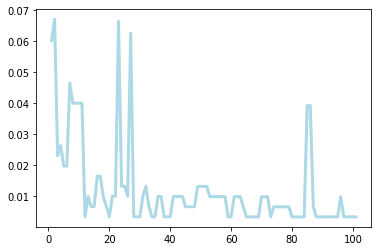

In [15]:
import matplotlib.pyplot as plt
x = df_100th['t']
y = df_spread_relative_100th
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color='lightblue', linewidth=3)
plt.savefig('foo.png')
plt.show()

(c)
Starting from the second trading round (t = 2), compute the change in the mid-price
from time t − 1 to time t, ∆mt = mt − mt−1 (e.g., for the second trading round you
have ∆m2 = m2 −m1), and the change in the transaction price from time t−1 to time
t, ∆pt = pt − pt−1. Run two OLS regressions (e.g., in Excel):
∆mt = αm + βm ∆mt−1 + t and ∆pt = αp + βp ∆pt−1 + t
Report the coefficients and t-stats (note: the dataset for the regressions starts in t = 3
since you have no ∆pt−1 for t = 2). What signs do the beta coefficients have, and how
would you interpret/explain these findings?

In [16]:
df_start_2= df.iloc[1:,:]
df_start_2

,t,Time,Trade Size (|q_t|),Price (p_t),Direction (d_t),Bid (b_t),Ask (a_t),Unnamed: 7
1,2,09:32:28,500,3.01,1,2.88,3.08,NaN
2,3,09:33:35,100,3.02,-1,3.01,3.08,NaN
3,4,09:33:38,100,3.00,1,3.00,3.08,NaN
4,5,09:34:09,100,3.03,1,3.02,3.08,NaN
5,6,09:34:45,100,3.03,1,3.02,3.08,NaN
...,...,...,...,...,...,...,...,...
1444,1445,15:59:12,200,3.06,1,2.97,3.10,NaN
1445,1446,15:59:12,200,3.06,1,2.97,3.10,NaN
1446,1447,15:59:12,200,3.06,1,2.97,3.10,NaN
1447,1448,15:59:12,200,3.06,1,2.97,3.10,NaN


In [17]:
# df_short = df.iloc[:1448,:]
# df_short
df

,t,Time,Trade Size (|q_t|),Price (p_t),Direction (d_t),Bid (b_t),Ask (a_t),Unnamed: 7
0,1,09:30:02,200,2.99,-1,2.90,3.08,NaN
1,2,09:32:28,500,3.01,1,2.88,3.08,NaN
2,3,09:33:35,100,3.02,-1,3.01,3.08,NaN
3,4,09:33:38,100,3.00,1,3.00,3.08,NaN
4,5,09:34:09,100,3.03,1,3.02,3.08,NaN
...,...,...,...,...,...,...,...,...
1444,1445,15:59:12,200,3.06,1,2.97,3.10,NaN
1445,1446,15:59:12,200,3.06,1,2.97,3.10,NaN
1446,1447,15:59:12,200,3.06,1,2.97,3.10,NaN
1447,1448,15:59:12,200,3.06,1,2.97,3.10,NaN


,t,Time_x,Trade Size (|q_t|)_x,Price (p_t)_x,Direction (d_t)_x,Bid (b_t)_x,Ask (a_t)_x,Unnamed: 7_x,Time_y,Trade Size (|q_t|)_y,Price (p_t)_y,Direction (d_t)_y,Bid (b_t)_y,Ask (a_t)_y,Unnamed: 7_y
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:30:02,200,2.99,-1,2.90,3.08,NaN
1,2,09:32:28,500.0,3.01,1.0,2.88,3.08,NaN,09:32:28,500,3.01,1,2.88,3.08,NaN
2,3,09:33:35,100.0,3.02,-1.0,3.01,3.08,NaN,09:33:35,100,3.02,-1,3.01,3.08,NaN
3,4,09:33:38,100.0,3.00,1.0,3.00,3.08,NaN,09:33:38,100,3.00,1,3.00,3.08,NaN
4,5,09:34:09,100.0,3.03,1.0,3.02,3.08,NaN,09:34:09,100,3.03,1,3.02,3.08,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1444,1445,15:59:12,200.0,3.06,1.0,2.97,3.10,NaN,15:59:12,200,3.06,1,2.97,3.10,NaN
1445,1446,15:59:12,200.0,3.06,1.0,2.97,3.10,NaN,15:59:12,200,3.06,1,2.97,3.10,NaN
1446,1447,15:59:12,200.0,3.06,1.0,2.97,3.10,NaN,15:59:12,200,3.06,1,2.97,3.10,NaN
1447,1448,15:59:12,200.0,3.06,1.0,2.97,3.10,NaN,15:59:12,200,3.06,1,2.97,3.10,NaN


In [ ]:
df_short_bid = df_short['Bid (b_t)']
df_short_ask = df_short['Ask (a_t)']
df_short_bid_ask_spread = df_short_ask - df_short_bid
df_short_midquote   = (df_short_ask + df_short_bid)/2
df_short_midquote 

0       2.990
1       2.980
2       3.045
3       3.040
4       3.050
        ...  
1443    3.025
1444    3.035
1445    3.035
1446    3.035
1447    3.035
Length: 1448, dtype: float64

In [ ]:
df_start_2_bid = df_start_2['Bid (b_t)']
df_start_2_ask = df_start_2['Ask (a_t)']
df_start_2_bid_ask_spread = df_start_2_ask - df_start_2_bid
df_start_2_midquote   = (df_start_2_ask + df_start_2_bid)/2
df_start_2_midquote

1       2.980
2       3.045
3       3.040
4       3.050
5       3.050
        ...  
1444    3.035
1445    3.035
1446    3.035
1447    3.035
1448    3.060
Length: 1448, dtype: float64

In [ ]:
# ∆mt = mt − mt−1 
df_mt_change =df_start_2_midquote - df_short_midquote 
df_mt_change
# ∆pt = pt − pt−1.

0       NaN
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
1444    0.0
1445    0.0
1446    0.0
1447    0.0
1448    NaN
Length: 1449, dtype: float64